# Loading Dataset

In [5]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Membaca dataset
df = pd.read_csv('/content/netflix_titles_CLEANED.csv')
df.head()
# Informasi dataset
df.info()

# Statistik deskriptif
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   directors     6173 non-null   object
 4   cast          7982 non-null   object
 5   countries     7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,show_id,type,title,directors,cast,countries,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,746,1714,NaN,17,220,514,8775
top,s8807,Movie,Zubaan,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,110,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


# Eksplorasi Data

## Nilai Unik Pada kolom "Type"

In [6]:

print("\n=== Nilai Unik pada kolom 'type' ===")
print(df['type'].unique())



=== Nilai Unik pada kolom 'type' ===
['Movie' 'TV Show']


## Jumlah data per kategori

In [7]:

print("\n=== Jumlah Data per Kategori 'type' ===")
print(df['type'].value_counts())


=== Jumlah Data per Kategori 'type' ===
type
Movie      6131
TV Show    2676
Name: count, dtype: int64


## Visualisasi distribusi

/tmp/ipython-input-1212226528.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='pastel')


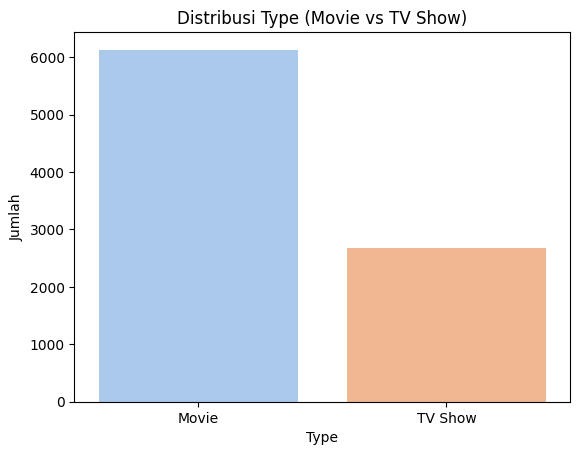

In [8]:
sns.countplot(data=df, x='type', palette='pastel')
plt.title('Distribusi Type (Movie vs TV Show)')
plt.xlabel('Type')
plt.ylabel('Jumlah')
plt.show()

# Pemilihan Fitur dan Label

In [9]:
# Konversi durasi ke angka (hapus kata "min" atau "Season")
def convert_duration(val):
    try:
        return int(val.split(' ')[0])
    except:
        return np.nan

df['duration_num'] = df['duration'].apply(convert_duration)
df['duration_num'].fillna(df['duration_num'].median(), inplace=True)

# Pilih fitur numerik yang relevan
X = df[['release_year', 'duration_num']]

# Label target
y = df['type']

# Encode label ke angka
le = LabelEncoder()
y = le.fit_transform(y)

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Cek hasil transformasi
print("\nContoh fitur setelah standarisasi:")
print(X_scaled[:5])



Contoh fitur setelah standarisasi:
[[ 0.65993048  0.3965588 ]
 [ 0.77332444 -1.33557493]
 [ 0.77332444 -1.35525827]
 [ 0.77332444 -1.35525827]
 [ 0.77332444 -1.33557493]]


/tmp/ipython-input-3895111792.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['duration_num'].fillna(df['duration_num'].median(), inplace=True)


# Split Data Training dan Testing

In [10]:
# Split dataset 80:20
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Jumlah data training:", X_train.shape[0])
print("Jumlah data testing :", X_test.shape[0])


Jumlah data training: 7045
Jumlah data testing : 1762


# Bangun Model SVM

In [11]:
# Buat model SVM dengan kernel linear
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)
print("Model SVM berhasil dilatih.")


Model SVM berhasil dilatih.


# Evaluasi Model

In [12]:
# Prediksi data uji
y_pred = model.predict(X_test)

# Hitung akurasi
acc = accuracy_score(y_test, y_pred)
print(f"\nAkurasi Model: {acc*100:.2f}%")

# Classification Report
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=le.classes_))



Akurasi Model: 99.94%

=== Classification Report ===
              precision    recall  f1-score   support

       Movie       1.00      1.00      1.00      1214
     TV Show       1.00      1.00      1.00       548

    accuracy                           1.00      1762
   macro avg       1.00      1.00      1.00      1762
weighted avg       1.00      1.00      1.00      1762



# Confusion Matrix

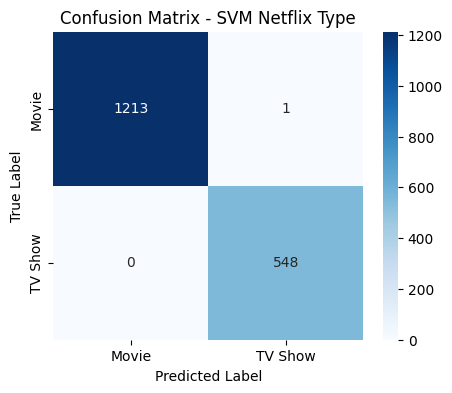

In [13]:
# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - SVM Netflix Type')
plt.show()


# Visualisasi Hasil Model (2D)

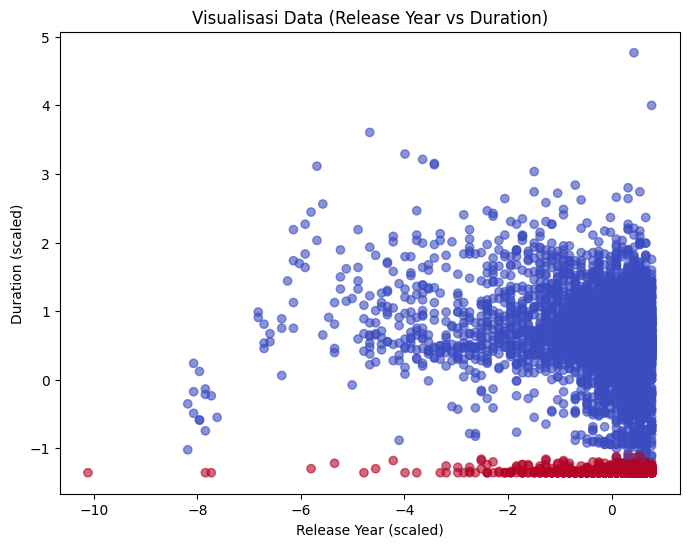

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y, cmap='coolwarm', alpha=0.6)
plt.title('Visualisasi Data (Release Year vs Duration)')
plt.xlabel('Release Year (scaled)')
plt.ylabel('Duration (scaled)')
plt.show()


# Visualisasi 3D

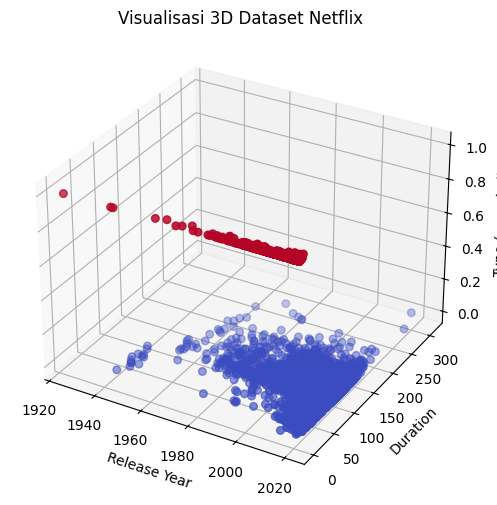

In [15]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['release_year'], df['duration_num'], y, c=y, cmap='coolwarm', s=30)
ax.set_xlabel('Release Year')
ax.set_ylabel('Duration')
ax.set_zlabel('Type (encoded)')
ax.set_title('Visualisasi 3D Dataset Netflix')
plt.show()
